Q1

In [ ]:
# import libraries
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load datasets
prices_df = pd.read_csv('data/prices.csv') 

# load store data json filep
with open('data/stores.json', 'r') as f:
    stores_data = json.load(f)

stores_df = pd.DataFrame(stores_data)

prices_df.head()

,Auditor ID,Date,Price,Store ID,UPC
0,234,10/18/17,24.95,66999,268588472
1,234,10/27/17,49.71,66999,475245085
2,234,10/20/17,25.75,66999,126967843
3,234,10/23/17,18.81,66999,708930835
4,234,10/23/17,33.32,66999,325885139


In [2]:

# merge prices_df and stores_df on store_id, Left join to add banner and region to each price
merged_df = pd.merge(prices_df, stores_df, on='Store ID', how='left')
merged_df.head()


,Auditor ID,Date,Price,Store ID,UPC,Banner,Region
0,234,10/18/17,24.95,66999,268588472,Walmart,Northern California
1,234,10/27/17,49.71,66999,475245085,Walmart,Northern California
2,234,10/20/17,25.75,66999,126967843,Walmart,Northern California
3,234,10/23/17,18.81,66999,708930835,Walmart,Northern California
4,234,10/23/17,33.32,66999,325885139,Walmart,Northern California


In [3]:
# now grouping by UPC, Banner, and Region and calculating the median price (aggregated)
grouped_df = merged_df.groupby(['UPC', 'Banner', 'Region']).agg({'Price': 'median'}).reset_index()
grouped_df.head()


,UPC,Banner,Region,Price
0,11873171,Safeway,Northern California,6.09
1,11873171,Safeway,Texas,5.19
2,11873171,Trader Joes,Texas,4.99
3,11873171,Walmart,Northern California,5.53
4,11873171,Walmart,Texas,4.75


In [4]:
# cross tabulation of banner and UPC by region and price for the desired output format
pivot = grouped_df.pivot_table(index=['Banner', 'UPC'],
                            columns='Region',
                            values='Price')
pivot.columns.name = None  # remove Region column name
final_df = pivot.reset_index()   # UPC and Banner are columns
final_df.head(100)

,Banner,UPC,Kansas,New York,Northern California,Texas
0,Safeway,11873171,NaN,NaN,6.09,5.19
1,Safeway,15052612,53.99,NaN,NaN,54.49
2,Safeway,16482322,17.89,NaN,NaN,18.09
3,Safeway,16729338,7.99,NaN,9.39,8.09
4,Safeway,16829288,3.59,NaN,4.19,3.59
...,...,...,...,...,...,...
95,Safeway,99830442,57.29,NaN,67.29,57.89
96,Safeway,101201265,47.99,NaN,56.29,48.49
97,Safeway,105664025,22.49,NaN,NaN,NaN
98,Safeway,106365705,20.39,NaN,NaN,20.59


In [5]:
# Define the new column order to match the desired output format
region_order = ['Northern California', 'New York', 'Kansas', 'Texas']

# Reorder columns
cols = ['Banner', 'UPC'] + region_order
final_df = final_df[cols]

In [6]:
# saving the final dataframe to a csv file
final_df.to_csv('regional_prices_by_banner.csv', index=False)

Q2

In [8]:
final_df.isnull().sum()

Banner                    0
UPC                       0
Northern California    3297
New York               1906
Kansas                 1844
Texas                  1166
dtype: int64

In [10]:
# now we check price gap of each row
final_df['price_range'] = final_df[['Northern California', 'New York', 'Kansas', 'Texas']].max(axis=1) - \
                    final_df[['Northern California', 'New York', 'Kansas', 'Texas']].min(axis=1)

final_df.sort_values('price_range', ascending=False).head(100)


,Banner,UPC,Northern California,New York,Kansas,Texas,price_range
4819,Whole Foods,888666503,74.49,66.09,1.99,NaN,72.5
4341,Whole Foods,421176959,74.09,65.69,1.99,NaN,72.1
4083,Whole Foods,158953776,73.69,65.39,1.99,63.49,71.7
4912,Whole Foods,981510405,73.69,NaN,1.99,NaN,71.7
4196,Whole Foods,276801250,73.69,65.39,1.99,63.39,71.7
...,...,...,...,...,...,...,...
4873,Whole Foods,945973686,NaN,62.69,1.99,NaN,60.7
4710,Whole Foods,790347148,54.29,62.69,1.99,46.69,60.7
4222,Whole Foods,300705072,62.59,55.59,1.99,53.89,60.6
4356,Whole Foods,436491453,NaN,62.49,1.99,NaN,60.5


In [12]:
# Look for duplicate UPCs across banners
dupes = final_df.groupby('UPC').filter(lambda x: len(x) > 1)
dupes.sort_values('UPC').head(10)


,Banner,UPC,Northern California,New York,Kansas,Texas,price_range
0,Safeway,11873171,6.09,NaN,NaN,5.19,0.90
1953,Walmart,11873171,5.53,NaN,NaN,4.75,0.78
3934,Whole Foods,11873171,NaN,5.69,1.99,5.49,3.70
977,Trader Joes,11873171,NaN,NaN,NaN,4.99,0.00
2938,Wegmans,11873171,NaN,5.19,NaN,5.09,0.10
1954,Walmart,15052612,57.13,50.75,NaN,NaN,6.38
1,Safeway,15052612,NaN,NaN,53.99,54.49,0.50
978,Trader Joes,15052612,60.19,NaN,NaN,NaN,0.00
3935,Whole Foods,15052612,NaN,59.49,1.99,57.79,57.50
2939,Wegmans,15052612,NaN,54.49,52.39,52.89,2.10


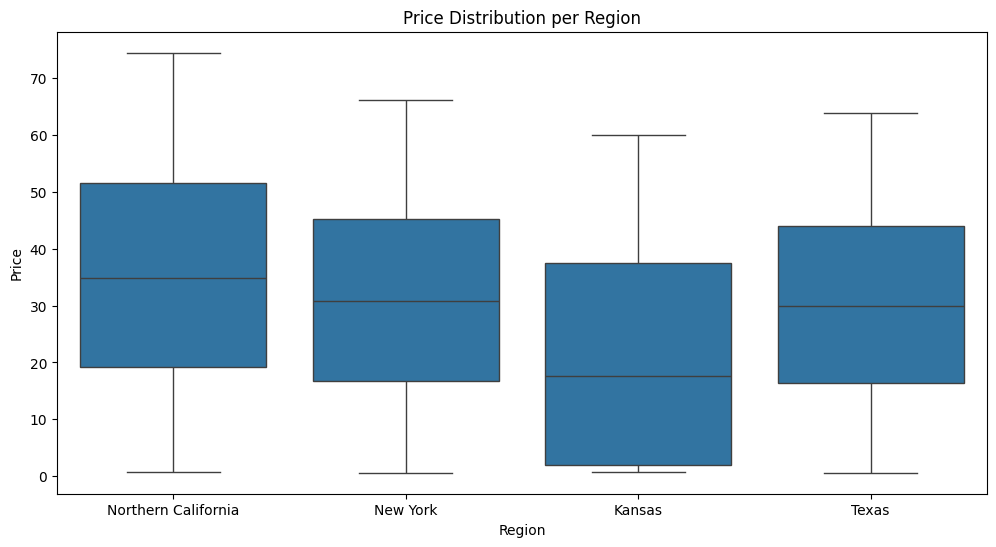

In [ ]:
df_melted = final_df.melt(id_vars=['Banner', 'UPC'], 
                    value_vars=['Northern California', 'New York', 'Kansas', 'Texas'],
                    var_name='Region', value_name='Price')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x='Region', y='Price')
plt.title("Price Distribution per Region")
plt.show()


In [16]:
# Long format makes this easier
df_melt = final_df.melt(id_vars=['Banner', 'UPC'], 
                  value_vars=['Northern California', 'New York', 'Kansas', 'Texas'], 
                  var_name='Region', 
                  value_name='Price')

# Find UPCs with more than 1 banner in same region
dup_check = df_melt.groupby(['UPC', 'Region']).filter(lambda x: len(x) > 1)

# Sort to see extreme differences
dup_check.sort_values(['UPC', 'Region', 'Price'], ascending=[True, True, False]).head(10)


,Banner,UPC,Region,Price
13796,Whole Foods,11873171,Kansas,1.99
9862,Safeway,11873171,Kansas,NaN
10839,Trader Joes,11873171,Kansas,NaN
11815,Walmart,11873171,Kansas,NaN
12800,Wegmans,11873171,Kansas,NaN
8865,Whole Foods,11873171,New York,5.69
7869,Wegmans,11873171,New York,5.19
4931,Safeway,11873171,New York,NaN
5908,Trader Joes,11873171,New York,NaN
6884,Walmart,11873171,New York,NaN


In [13]:
#  Group and Aggregate 
group_stats = (
    merged_df
    .groupby(["UPC", "Banner", "Region"])
    .agg(
        count=("Price", "count"),
        min_price=("Price", "min"),
        max_price=("Price", "max"),
        mean_price=("Price", "mean"),
        std_price=("Price", "std"),
        median_price=("Price", "median")
    )
    .reset_index()
)

#  Outlier Detection 
# Define thresholds for what counts as anomalous price variability
outliers = group_stats[
    (group_stats["std_price"] > 1.0) |
    ((group_stats["max_price"] - group_stats["min_price"]) > 2.0)
]

#  Display Results 
print("Number of outlier groups detected:", len(outliers))
display(outliers)


Number of outlier groups detected: 0


,UPC,Banner,Region,count,min_price,max_price,mean_price,std_price,median_price


In [ ]:


# compute median price per upc, banner, and region
grouped = (
    merged_df.groupby(["UPC", "Banner", "Region"])["Price"]
    .median()
    .reset_index()
)

# pivot table to compare regional prices side by side
pivot_df = grouped.pivot_table(index=["UPC", "Banner"], columns="Region", values="Price").reset_index()

# define logic to flag regional inconsistencies
def flag_unexpected(row):
    violations = []
    try:
        if row["Kansas"] and row["New York"] and row["Kansas"] > row["New York"]:
            violations.append("Kansas > New York")
        if row["Kansas"] and row["Northern California"] and row["Kansas"] > row["Northern California"]:
            violations.append("Kansas > NorCal")
        if row["Texas"] and row["Northern California"] and row["Texas"] > row["Northern California"]:
            violations.append("Texas > NorCal")
    except KeyError:
        pass
    return ", ".join(violations) if violations else None

# apply violation checks to each row
pivot_df["Violation"] = pivot_df.apply(flag_unexpected, axis=1)

# filter only rows with violations
violations_df = pivot_df[pivot_df["Violation"].notna()]

# show result
print("number of regional inconsistencies found:", len(violations_df))
display(violations_df)


number of regional inconsistencies found: 20


Region,UPC,Banner,Kansas,New York,Northern California,Texas,Violation
181,45845527,Whole Foods,1.99,1.79,NaN,NaN,Kansas > New York
381,77460052,Whole Foods,1.99,NaN,1.39,NaN,Kansas > NorCal
897,198082596,Whole Foods,1.99,0.69,0.69,0.59,"Kansas > New York, Kansas > NorCal"
1251,269161785,Safeway,48.89,NaN,40.29,49.39,"Kansas > NorCal, Texas > NorCal"
1329,278739906,Whole Foods,1.99,1.09,1.19,NaN,"Kansas > New York, Kansas > NorCal"
1430,301161010,Walmart,32.54,33.82,38.17,42.79,Texas > NorCal
1817,375780233,Walmart,1.86,1.81,2.12,NaN,Kansas > New York
2392,499640947,Walmart,0.93,0.92,1.03,NaN,Kansas > New York
2394,499640947,Whole Foods,1.99,0.99,NaN,0.99,Kansas > New York
2474,509116779,Whole Foods,1.99,1.49,NaN,NaN,Kansas > New York


20 products showed unexpected pricing where Kansas or Texas had higher prices than costlier regions like New York or Northern California. Most violations were “Kansas > New York,” especially among Whole Foods and Walmart items, suggesting potential data entry errors, regional labeling issues, or true pricing anomalies.

In [14]:
# find rows with missing banner or region
missing_store_info = merged_df[merged_df["Banner"].isna() | merged_df["Region"].isna()]

# find rows with missing or invalid prices (zero or negative)
invalid_prices = merged_df[(merged_df["Price"].isna()) | (merged_df["Price"] <= 0)]

# combine all problematic rows
data_issues = pd.concat([missing_store_info, invalid_prices]).drop_duplicates()

# show result
print("number of problematic rows found:", len(data_issues))
display(data_issues)


number of problematic rows found: 804


,Auditor ID,Date,Price,Store ID,UPC,Banner,Region
813,536,10/19/17,48.69,60957,340260209,NaN,NaN
814,536,10/29/17,55.79,60957,749133422,NaN,NaN
815,536,10/25/17,5.99,60957,16999755,NaN,NaN
816,536,10/28/17,11.09,60957,673299284,NaN,NaN
817,536,10/27/17,32.79,60957,204071291,NaN,NaN
...,...,...,...,...,...,...,...
4607,203,10/16/17,32.59,38472,915191199,NaN,NaN
4608,203,10/20/17,8.89,38472,949435750,NaN,NaN
4609,203,10/17/17,12.59,38472,561425157,NaN,NaN
4610,203,10/18/17,47.39,38472,963229417,NaN,NaN


Out of all the records in the dataset, **804 entries are problematic** due to **missing store metadata**. Specifically:

- Each of these rows has a valid `Store ID`, but this ID is **not listed in the `stores.json` file**, so the corresponding `Banner` and `Region` values are `NaN`.
- No issues were found with prices being zero or negative — all prices in these rows are **positive and plausible**.

### what this means

- These entries **cannot be used in regional or banner-level analysis**, as their location context is unknown.
- The problem may be due to:
  - **outdated or incomplete store mapping** in `stores.json`
  - **mislabeled or deprecated store IDs** in the raw data
- One auditor in particular (e.g., ID `536`) seems responsible for a large number of these entries, indicating either an old data batch or a specific audit campaign tied to unmapped stores.

### recommendation

- **exclude these 804 rows** from final aggregation or analysis unless a corrected `stores.json` is provided.
- optionally flag them in the report as needing validation from the data collection team.


In [15]:
# load data
auditors_df = pd.read_csv("data/auditors.csv")

with open("data/stores.json", "r") as f:
    stores_data = json.load(f)

stores_df = pd.DataFrame(stores_data)

# merge prices with store and auditor information
merged_df = pd.merge(prices_df, stores_df, on="Store ID", how="left")
full_df = pd.merge(merged_df, auditors_df, on="Auditor ID", how="left")

# calculate price statistics for each auditor
auditor_stats = (
    full_df.groupby("Auditor ID")["Price"]
    .agg(["count", "mean", "std", "min", "max"])
    .reset_index()
)

# flag auditors with unusually high variance or wide price range
flagged_auditors = auditor_stats[
    (auditor_stats["std"] > 10) |
    ((auditor_stats["max"] - auditor_stats["min"]) > 50)
]

# show result
print("number of auditors flagged:", len(flagged_auditors))
display(flagged_auditors)


number of auditors flagged: 8


,Auditor ID,count,mean,std,min,max
0,63,1477,28.787549,15.887705,0.79,57.39
1,98,2090,32.731388,18.016973,0.59,70.09
2,203,1744,29.707683,16.632323,0.59,62.39
3,234,412,32.854515,17.821547,0.93,63.12
4,304,2288,30.921818,17.170720,0.59,63.89
5,536,1217,36.406023,20.139769,0.69,74.49
6,713,1302,10.440922,15.842019,1.09,57.89
7,1326,1785,29.376728,16.272128,0.69,59.99


### auditor behavior analysis

we identified **8 auditors** with unusually high variability in the prices they reported. these auditors exhibited either a **standard deviation above 10** or a **price range greater than $50**, which may suggest inconsistent data entry, wide coverage of store/product types, or lack of calibration.

### interpretation

these auditors may have covered a mix of high- and low-price stores or products, or their results could reflect inconsistencies in how prices were recorded. further review may be needed to validate their assignments or audit quality.
